In [1]:
# Data Load
from tensorflow.keras.datasets import reuters

num_words = 10000

(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape, y_train.shape)

(8982,) (8982,)


In [2]:
#Preprocessing Data
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 데이터의 길이를 모두 500으로 padding 
max_len = 500

x_train = pad_sequences(x_train,maxlen=max_len)
x_test = pad_sequences(x_test,maxlen=max_len)

print(x_train.shape)

(8982, 500)


In [3]:

#Create Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim=num_words,output_dim=64))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


In [4]:

#Learing Model 
history = model.fit(x_train,y_train,
                   batch_size=32,
                   epochs = 20,
                   validation_split = 0.2)

Epoch 1/20
225/225 [==============================] - 55s 245ms/step - loss: 2.5638 - acc: 0.3513 - val_loss: 2.4063 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 53s 235ms/step - loss: 2.3854 - acc: 0.3486 - val_loss: 2.2233 - val_acc: 0.3450
Epoch 3/20
225/225 [==============================] - 55s 243ms/step - loss: 1.9936 - acc: 0.5055 - val_loss: 1.8133 - val_acc: 0.5693
Epoch 4/20
225/225 [==============================] - 55s 243ms/step - loss: 1.7419 - acc: 0.5556 - val_loss: 1.7865 - val_acc: 0.5582
Epoch 5/20
225/225 [==============================] - 55s 245ms/step - loss: 1.6465 - acc: 0.5786 - val_loss: 1.6245 - val_acc: 0.5915
Epoch 6/20
225/225 [==============================] - 55s 245ms/step - loss: 1.5389 - acc: 0.6054 - val_loss: 1.6204 - val_acc: 0.5932
Epoch 7/20
225/225 [==============================] - 55s 244ms/step - loss: 1.4303 - acc: 0.6319 - val_loss: 1.5346 - val_acc: 0.6043
Epoch 8/20
225/225 [==============================] - 5

<ipython-input-5-928048096476>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


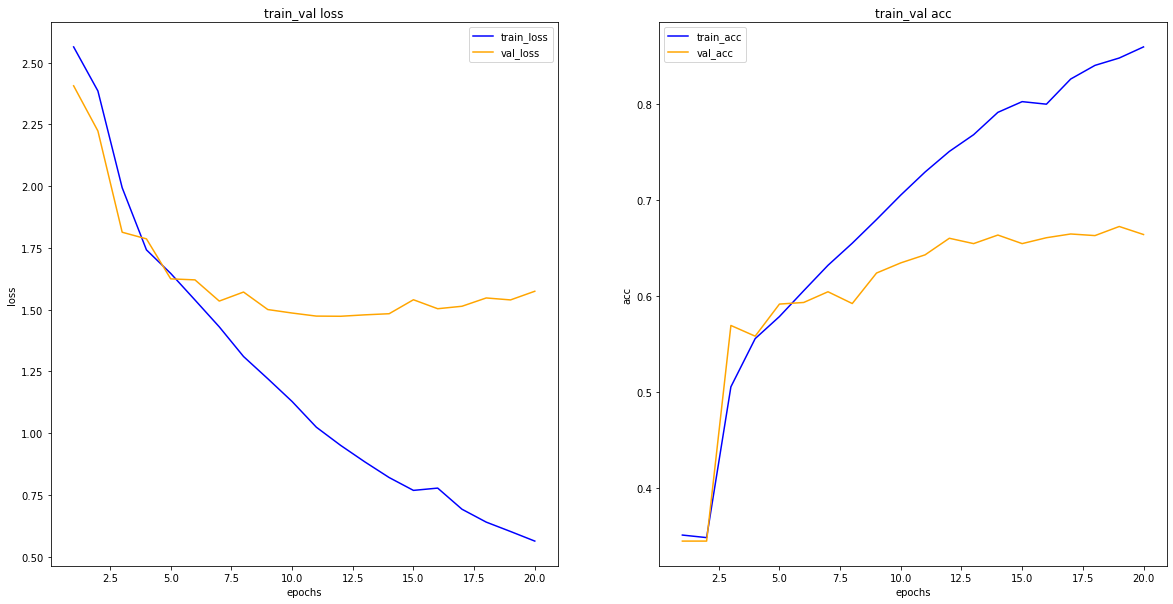

In [5]:
# Learning Visualize

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

acc = his_dict['acc']
val_acc = his_dict['val_acc']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train_val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('train_val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

fig.show()
